In [1]:
import numpy as np
import pandas as pd
from RegscorePy.aic import aic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\housing_data_sample.csv", index_col='Id')

In [3]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
2ndFlrSF        0.319334
LotArea         0.263843
Name: SalePrice, dtype: float64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], random_state=42)

In [5]:
lr = LinearRegression() 
lr.fit(x_train, y_train) 
print(lr.score(x_train, y_train)) 
print(lr.score(x_test, y_test))

0.6922037863468924
0.7335111149578266


In [6]:
print(lr.coef_) 
print(lr.intercept_)

[ 4.69748692e-01  8.27939635e+02 -3.57322963e+03 -2.59678130e+01
  6.46264545e+01  9.74383176e+01  7.18384417e+01]
-1619889.011053286


<Axes: ylabel='None'>

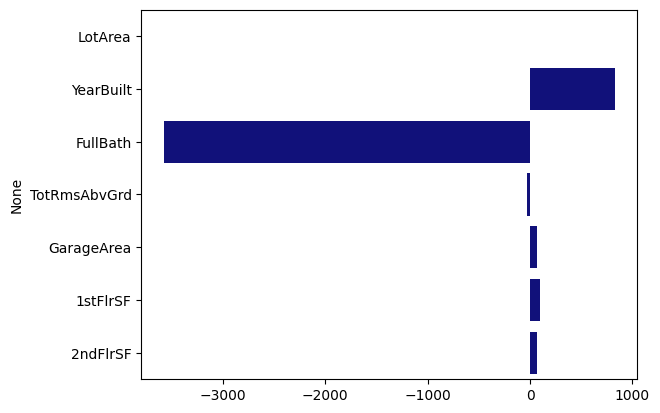

In [7]:
sns.barplot(x=lr.coef_, y=x_train.columns, color='darkblue')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

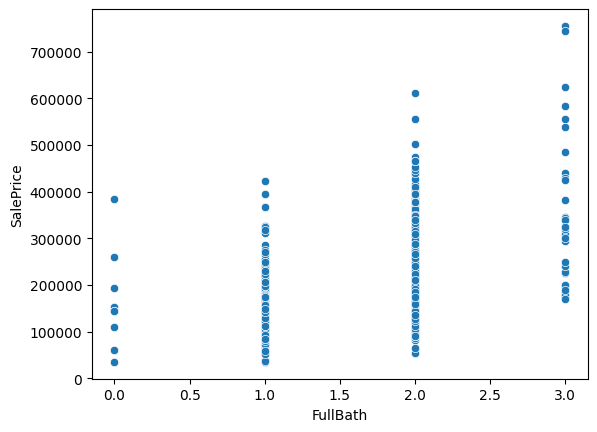

In [8]:
sns.scatterplot(x=df['FullBath'], y=df['SalePrice'])

In [9]:
sm_lr = sm.OLS(y_train, sm.add_constant(x_train)) 
res = sm_lr.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     349.2
Date:                Sat, 29 Mar 2025   Prob (F-statistic):          6.20e-273
Time:                        15:24:35   Log-Likelihood:                -13242.
No. Observations:                1095   AIC:                         2.650e+04
Df Residuals:                    1087   BIC:                         2.654e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.62e+06   1.07e+05    -15.165      0.000   -1.83e+06   -1.41e+06
LotArea          0.4697      0.126      3.729      0.000       0.223       0.717
YearBuilt      827.9396     55.108     15.024      0.000     719.810     936.069
FullBath     -3573.2296   3523.070     -1.014      0.311   -1.05e+04    3339.558
TotRmsAbvGrd   -25.9678   1451.611     -0.018      0.986   -2874.245    2822.309
GarageArea      64.6265      8.145      7.934      0.000      48.645      80.608
1stFlrSF        97.4383      5.722     17.029      0.000      86.211     108.665
2ndFlrSF        71.8384      5.337     13.461      0.000      61.367      82.310
==============================================================================
Omnibus:                      425.967   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33633.259
Skew:                          -0.872   Prob(JB):                         0.00
Kurtosis:                      30.095   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
l1_lr = LassoCV() 
l1_lr.fit(x_train, y_train)

LassoCV()

In [11]:
knr = KNeighborsRegressor() 
knr.fit(x_train, y_train) 
print(knr.score(x_train, y_train)) 
print(knr.score(x_test, y_test))

0.7168991317708466
0.6053836803555437


In [12]:
r2_score(y_train, [y_train.mean()] * y_train.shape[0])

0.0

In [13]:
r2 = r2_score(y_test, l1_lr.predict(x_test)) 
n, p = x_test.shape 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) 
print(r2) 
print(adj_r2)

0.730783035952028
0.7255042719510874


In [14]:
aic(y_train, l1_lr.predict(x_train), x_train.shape[1])

np.float64(23428.909241893743)

In [15]:
mse(y_test, l1_lr.predict(x_test))

1885948035.2885683

In [16]:
mae(y_test, l1_lr.predict(x_test))

27295.84646037545

In [17]:
""" Linear relationships between features and the target
 Normally distributed data
 No multicollinearity between features
 No autocorrelation of the target
 Homoscedasticity (uniformity of the spread of residual values across
 the data)"""

' Linear relationships between features and the target\n Normally distributed data\n No multicollinearity between features\n No autocorrelation of the target\n Homoscedasticity (uniformity of the spread of residual values across\n the data)'

Text(0, 0.5, 'residuals')

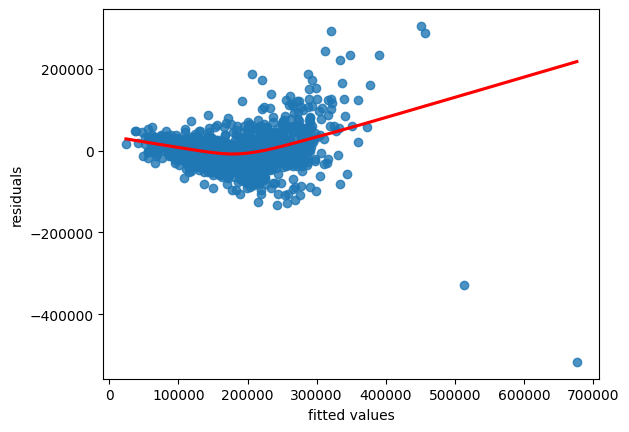

In [18]:
predictions = l1_lr.predict(df.drop('SalePrice', axis=1)) 
residuals = df['SalePrice'] - predictions 
sns.regplot(x=predictions, 
            y=residuals, 
            lowess=True, 
            line_kws={'color': 'red'}) 
plt.xlabel('fitted values') 
plt.ylabel('residuals')

In [19]:
for i in range(1, 11): 
    print(y_train.autocorr(i))

-0.024452741167749596
0.03064440639502165
-0.015481612668592956
0.002602145767690311
0.01982697854626573
-0.011435525035109658
-0.0341597554806536
-0.0020234951006570345
-0.017432419337789173
0.005797703261521396


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

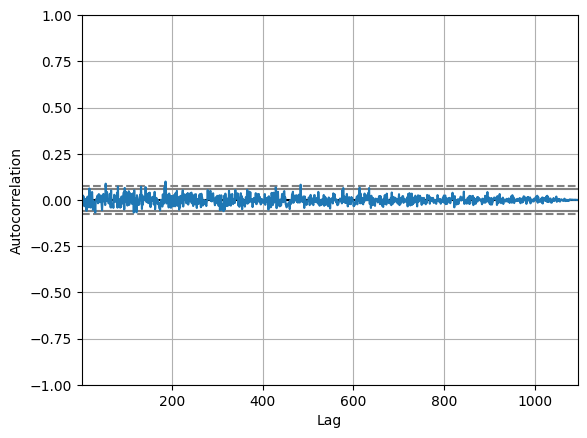

In [20]:
pd.plotting.autocorrelation_plot(y_train)

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'sqrt(standardized residuals)')

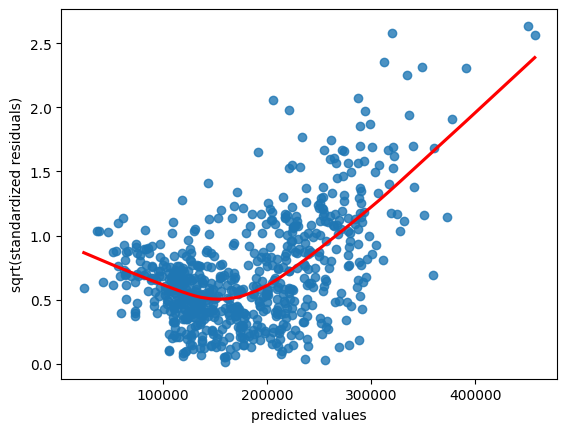

In [21]:
standardized_residuals = np.sqrt(residuals / residuals.std()) 
sns.regplot(x=predictions, 
            y=standardized_residuals, 
            lowess=True, 
            line_kws={'color': 'red'}) 
plt.xlabel('predicted values') 
plt.ylabel('sqrt(standardized residuals)')